In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import kagglehub

In [3]:
data=pd.read_csv("/content/medical.csv")
data.head()

,Disease,Age,Gender,Smoker status
0,diseased,43,Male,Smoker
1,not diseased,18,Male,Smoker
2,diseased,22,Female,Non-smoker
3,diseased,25,Male,Non-smoker
4,not diseased,45,Female,Smoker


In [4]:
data.dtypes

,0
Disease,object
Age,int64
Gender,object
Smoker status,object


In [6]:
data_encoded=pd.get_dummies(data,drop_first=True)
data_encoded.head()

,Age,Disease_not diseased,Gender_Male,Smoker status_Smoker
0,43,False,True,True
1,18,True,True,True
2,22,False,False,False
3,25,False,True,False
4,45,True,False,True


In [8]:
data_encoded.dtypes

,0
Age,int64
Disease_not diseased,bool
Gender_Male,bool
Smoker status_Smoker,bool


In [9]:
data_encoded.isnull().sum()

,0
Age,0
Disease_not diseased,0
Gender_Male,0
Smoker status_Smoker,0


In [12]:
x=data_encoded[['Gender_Male','Age','Smoker status_Smoker']]
y=data_encoded['Disease_not diseased']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=92)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(28, 3)

(28,)

(8, 3)

(8,)

In [14]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [15]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[4 0]
 [1 3]]
Accuracy Score :  0.875
Accuracy in Percentage :  87 %


<Axes: >

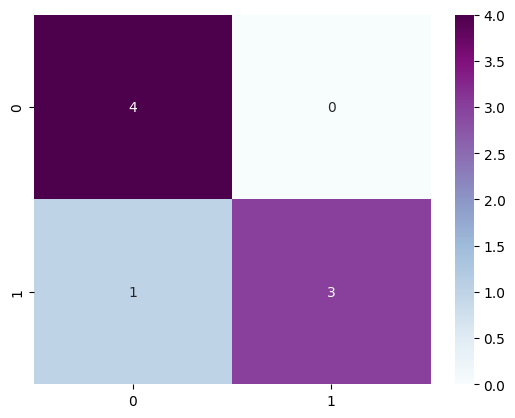

In [17]:
sn.heatmap(conf_mat, annot=True, cmap='BuPu')